# Data Exploration

In [1]:
import yaml
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import join
from summarytools import dfSummary

In [2]:
with open('config.yaml', 'r') as file:
    config = yaml.safe_load(file)

data_path = config['paths']['data']
model_path = config['paths']['model']

In [3]:
raw_path = join(data_path, 'raw/video_game_dataset.csv')

df = pd.read_csv(raw_path)
df.head(20)

,Name,Platform,Publisher,Genre,Metascore,User_Score,Release_Year
0,Senua's Saga: Hellblade II,Xbox,Xbox,Action,81.0,7.5,2024.0
1,Zet Zillion,PC,Raw Fury,Card,79.0,8.8,2024.0
2,Duck Detective: The Secret Salami,PC,Happy Broccoli Games,Adventure,81.0,6.8,2024.0
3,Rakugaki,PC,Gearbox Publishing,Action,79.0,7.2,2024.0
4,Elden Ring,PS5,Bandai Namco Games,Action,96.0,8.8,2022.0
5,The Witcher 3: Wild Hunt - Complete Edition,Nitendo Switch,CD Projekt Red Studio,Action,85.0,8.8,2019.0
6,NieR: Automata,PC,Square Enix,Action,88.0,8.9,2017.0
7,NieR Replicant,PC,Square Enix,Action,83.0,9.5,2021.0
8,Drakengard,PS2,Square Enix,Action,63.0,7.7,2004.0
9,Drakengard 2,PS2,Square Enix,Action,58.0,6.5,2006.0


In [4]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Name[object],1. Terraria2. Need for Speed: Most Wanted3. Turbo: Super Stunt Squad4. Adventure Time: Finn & Jake In5. Rugby World Cup 20156. Just Dance 20177. Major League Baseball 2K118. Surf's Up9. Generator Rex: Agent of Provid10. Rugby 1511. other,"14 (0.1%)13 (0.1%)12 (0.1%)12 (0.1%)12 (0.1%)11 (0.0%)11 (0.0%)11 (0.0%)10 (0.0%)10 (0.0%)23,595 (99.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAADQklEQVR4nO3cwWkbYRRG0TdCJPZGQghUQtKDisg2HauINGGkReJ44yyCS8gdmJxTwb+48BDMp+X9/X2gsFv7Afw/xEZGbGTERkZsZMRGRmxkxEZGbGTERma3LMvXZVme1n4I27ebmS8z83nth7B9zigZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkdnNzI+Z+b32Q9i+xb8YUXFGyYiNjHUVGesqMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyIiNjHUVGesqMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVknFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyBi8kDF4IeOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVknFEyYiNjXUXGuoqMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyBi8kDF4IeOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxhklIzYyYiNjXUXGuoqMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6iox1FRlnlIzYyBi8kDF4IeOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxhkls8zM88x8WvshbN7b/nw+fzscDqe1X8K2PR6Pl/3hcDhdr9dfx+Pxde0HsU33+/3pdrud9jMzx+Px9XK5/Fz7UWzasx8IZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZPYzfz8BWfshbNdHX8v5fP7u40n+tcfj8eKzcCpv1lVk/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiPzB0WpV2yec8bJAAAAAElFTkSuQmCC"">",3(0.0%)
2,Platform[object],1. DS2. PS23. PSP4. Wii5. PC6. PS37. X3608. PS9. XB10. GBA11. other,"3,314 (14.0%)2,862 (12.1%)1,918 (8.1%)1,779 (7.5%)1,744 (7.4%)1,706 (7.2%)1,592 (6.7%)1,541 (6.5%)1,180 (5.0%)1,161 (4.9%)4,914 (20.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAAEDElEQVR4nO3dQWobSQCG0dIgwmQjYQw+jA8xh51D6DbGWIskZKMshllGUrdK3+DRewdosvgo0U39zuZ0Og0o/PFf/wN4HGIjIzYyYiMjNjJiIyM2MmIjIzYymzHG1zHGlzs8++fpdPp+h+fySW2fn5//2u12T7MffDwe3zebzd+C41/b3W739Pr6+n2/3/+Y9dCPj48/D4fD09vb25cxhtgYY4yxHWOM/X7/4+Xl5dvkZ3+d/Dw+OS8IZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGZjvGP/fPZj509vP4f9gej8f3w+HwNCbfPzsej+9jjJ8zn8nnZoNAZuNPZlGZfbI5zfitqesqiyrOmbausqjiktnrKosqfstHXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjLTBi9GLlwydfBi5MI5roWTMXghs/Zkc4Kx2KrBi2ELaywevBi2sNbawYthC4v5qEtGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZm8eDFsIW1Vg1eDFtYw7VwMgYvZLwgkFnzM+onlFUWr6ssq1hr0brKsopbrFlXWVaxihcEMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MovWVZZV3GLxusqyirVcCydjXUVm6cnmVGO1RYMXYxducfXgxdiFWy0dvBi7sJqPumTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGSuHrwYu3CrRYMXYxdu4Vo4GYMXMk42MgYvZAxeyBi8kPFRl4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuImODQMa6isySk82pxk2uXldZVnGrq9ZVllXMsGRdZVnFTXzUJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI3PV4MXYhRmuHrwYu3Ar18LJGLyQcbKRMXghY/BCxuCFjI+6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHEtnIzBCxkvCGSu+Rn188kUF9dVVlXMcnZdZVXFTNesq6yqmMILAhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG5mz6yqrKma6uK6yqmIW18LJWFeRcbKRMXghY/BCxuCFjI+6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHEtnIzBC5kl/1HavTg5H8TFwcu9GdQ8jrODl3szqHks1wxe7s2g5kH4qEtGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbm7ODl3gxqHsvFwcu9GdQ8DtfCyRi8kPGCQEZsZMRGRmxkxEZGbGTERkZsZMRG5hclNk7i5YpLVAAAAABJRU5ErkJggg=="">",0(0.0%)
3,Publisher[object],1. Electronic Arts2. Namco Bandai Games3. Ubisoft4. Activision5. Konami Digital Entertainment6. THQ7. Sega8. Sony Computer Entertainment9. Nintendo10. Tecmo Koei11. other,"1,579 (6.7%)1,396 (5.9%)1,258 (5.3%)1,217 (5.1%)1,208 (5.1%)877 (3.7%)861 (3.6%)835 (3.5%)801 (3.4%)567 (2.4%)13,112 (55.3%)","<img src = ""data:image/png;base64, iVBORw0KGg

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23711 entries, 0 to 23710
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          23708 non-null  object 
 1   Platform      23711 non-null  object 
 2   Publisher     23633 non-null  object 
 3   Genre         23708 non-null  object 
 4   Metascore     10790 non-null  float64
 5   User_Score    9829 non-null   float64
 6   Release_Year  23331 non-null  float64
dtypes: float64(3), object(4)
memory usage: 1.3+ MB


In [6]:
df.shape

(23711, 7)

In [7]:
df.nunique()

Name            11705
Platform           40
Publisher         635
Genre              29
Metascore          82
User_Score         95
Release_Year       45
dtype: int64

In [8]:
df[['Metascore', 'User_Score']].describe()

,Metascore,User_Score
count,10790.000000,9829.000000
mean,68.018999,7.081473
std,14.225633,1.546408
min,13.000000,0.000000
25%,59.000000,6.300000
50%,70.000000,7.500000
75%,79.000000,8.200000
max,98.000000,9.700000


# Data Cleaning

In [9]:
df.isnull().sum()

Name                3
Platform            0
Publisher          78
Genre               3
Metascore       12921
User_Score      13882
Release_Year      380
dtype: int64

In [10]:
df['Metascore'].fillna(df['Metascore'].mean())
df['User_Score'].fillna(df['User_Score'].mean())

df.dropna(inplace=True, axis=0)

df.isnull().sum(), df.shape

(Name            0
 Platform        0
 Publisher       0
 Genre           0
 Metascore       0
 User_Score      0
 Release_Year    0
 dtype: int64,
 (8896, 7))

In [11]:
df.duplicated().sum()

1852

In [12]:
df.drop_duplicates(inplace=True)
df.shape

(7044, 7)

In [13]:
df.to_csv(join(data_path,'processed/processed_data.csv'), index=False)

# Data Visualization

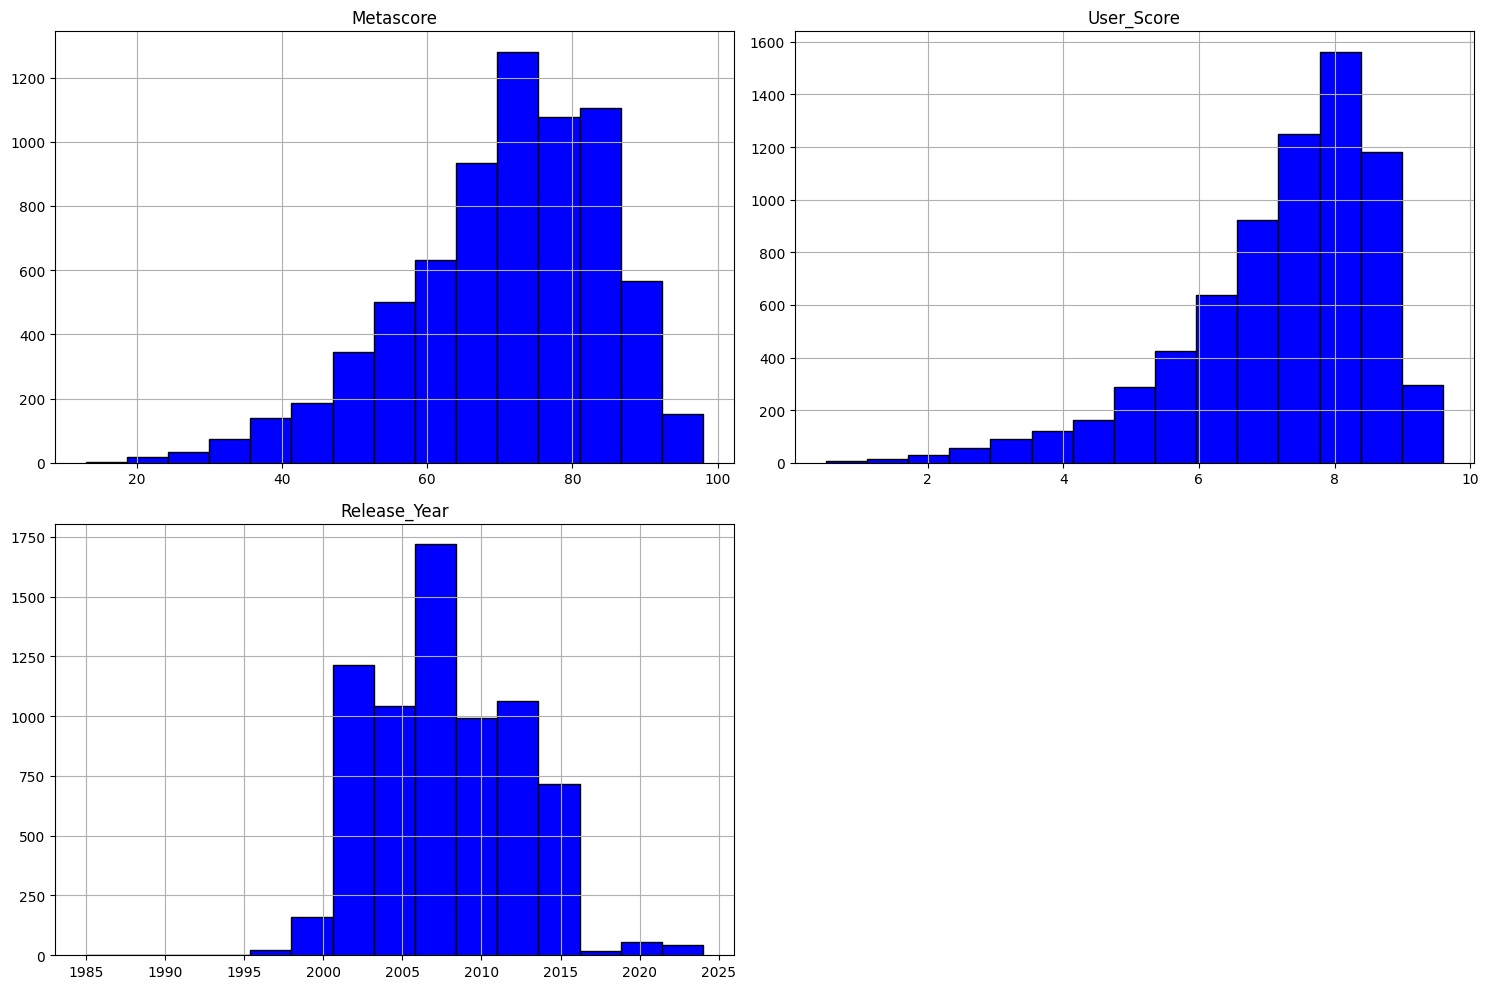

In [14]:
df.hist(bins=15, figsize=(15, 10), color='blue', edgecolor='black')
plt.tight_layout()
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_30300\111495589.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette=palettes[idx])
C:\Users\Acer\AppData\Local\Temp\ipykernel_30300\111495589.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette=palettes[idx])


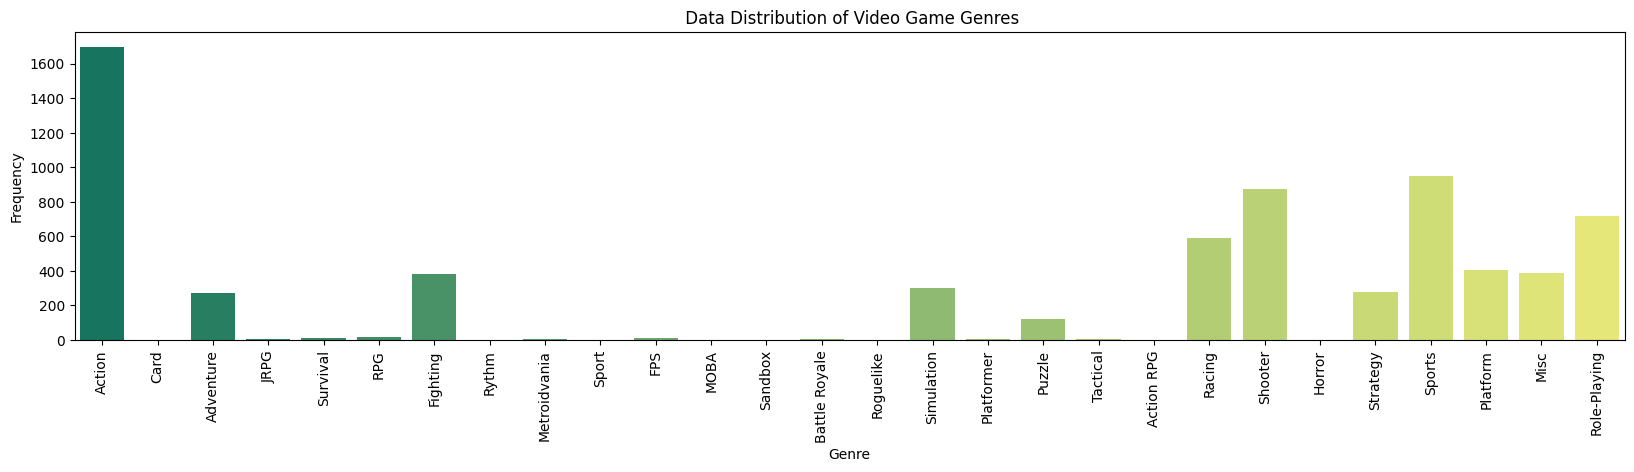

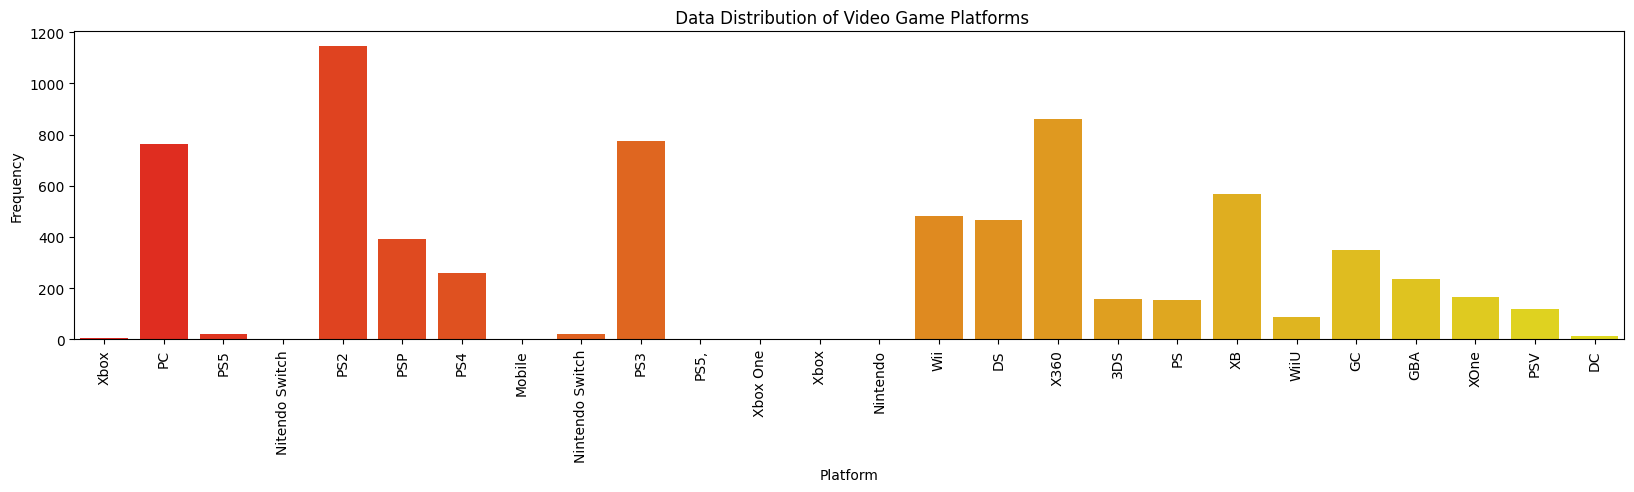

In [15]:
features = df[['Genre', 'Platform']].columns
palettes = ['summer', 'autumn']

for idx, feature in enumerate(features):
    plt.figure(figsize = (20,4))
    sns.countplot(data=df, x=feature, palette=palettes[idx])
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(" Data Distribution of Video Game " + feature + "s")
    plt.xticks(rotation=90)
plt.show()

# Feature Engineering

In [16]:
categorical_columns = [feature for feature in df.columns if df[feature].dtype=='O']
categorical_columns = categorical_columns[1:]

categorical_columns

['Platform', 'Publisher', 'Genre']

## Encoding

In [17]:
df_dummy = pd.get_dummies(data=df, columns=categorical_columns)
df_dummy.head(5)

,Name,Metascore,User_Score,Release_Year,Platform_ Xbox,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,...,Genre_Role-Playing,Genre_Rythm,Genre_Sandbox,Genre_Shooter,Genre_Simulation,Genre_Sport,Genre_Sports,Genre_Strategy,Genre_Survival,Genre_Tactical
0,Senua's Saga: Hellblade II,81.0,7.5,2024.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Zet Zillion,79.0,8.8,2024.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Duck Detective: The Secret Salami,81.0,6.8,2024.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Rakugaki,79.0,7.2,2024.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Elden Ring,96.0,8.8,2022.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

features_dummy = df_dummy.drop(columns=['Name'], axis=1)

scale = StandardScaler()
scaled_features = scale.fit_transform(features_dummy)
scaled_features = pd.DataFrame(scaled_features, columns=features_dummy.columns)

scaled_features.head(5)

,Metascore,User_Score,Release_Year,Platform_ Xbox,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_Mobile,...,Genre_Role-Playing,Genre_Rythm,Genre_Sandbox,Genre_Shooter,Genre_Simulation,Genre_Sport,Genre_Sports,Genre_Strategy,Genre_Survival,Genre_Tactical
0,0.751179,0.210426,3.583417,-0.011916,-0.150493,-0.044626,-0.265856,-0.186593,-0.228317,-0.016853,...,-0.336375,-0.011916,-0.016853,-0.375877,-0.212011,-0.016853,-0.39483,-0.20308,-0.035768,-0.020642
1,0.607353,1.114530,3.583417,-0.011916,-0.150493,-0.044626,-0.265856,-0.186593,-0.228317,-0.016853,...,-0.336375,-0.011916,-0.016853,-0.375877,-0.212011,-0.016853,-0.39483,-0.20308,-0.035768,-0.020642
2,0.751179,-0.276399,3.583417,-0.011916,-0.150493,-0.044626,-0.265856,-0.186593,-0.228317,-0.016853,...,-0.336375,-0.011916,-0.016853,-0.375877,-0.212011,-0.016853,-0.39483,-0.20308,-0.035768,-0.020642
3,0.607353,0.001787,3.583417,-0.011916,-0.150493,-0.044626,-0.265856,-0.186593,-0.228317,-0.016853,...,-0.336375,-0.011916,-0.016853,-0.375877,-0.212011,-0.016853,-0.39483,-0.20308,-0.035768,-0.020642
4,1.829878,1.114530,3.143234,-0.011916,-0.150493,-0.044626,-0.265856,-0.186593,-0.228317,-0.016853,...,-0.336375,-0.011916,-0.016853,-0.375877,-0.212011,-0.016853,-0.39483,-0.20308,-0.035768,-0.020642


In [19]:
scaled_features.to_csv(join(data_path, 'processed/scaled_features.csv'), index=False)